In [1]:
import tensorflow as tf

In [2]:
x1 = tf.constant(1 , name = "constant-1")
x2 = tf.constant(2 , name = "constant-2")
x3 = tf.add (x1 , x2)


In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv('FuelConsumptionCo2.csv')
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
x_d = data.loc[:, 'ENGINESIZE'].values
y_d = data.loc[:, 'CO2EMISSIONS'].values


In [6]:
x = tf.constant(x_d, dtype=tf.float32)
y = tf.constant(y_d, dtype=tf.float32)

In [7]:
w = tf.Variable(2.0, dtype=tf.float32)
b = tf.Variable(7.0, dtype=tf.float32)

In [8]:
def H(x):
    y_p = w * x + b
    return y_p

In [9]:
def cost_function(y_actual , y_prediction):
    mse = tf.reduce_mean(tf.square(y_actual - y_prediction))
    return mse

In [10]:
lr = 0.01
epochs = 1000
losses_valus = []
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        y_pred = H(x)
        loss = cost_function(y , y_pred)
        losses_valus.append(loss)
    gradients = tape.gradient(loss , [w , b])
    w.assign_sub(lr * gradients[0])
    b.assign_sub(lr * gradients[1])


loss

<tf.Tensor: shape=(), dtype=float32, numpy=951.6014404296875>

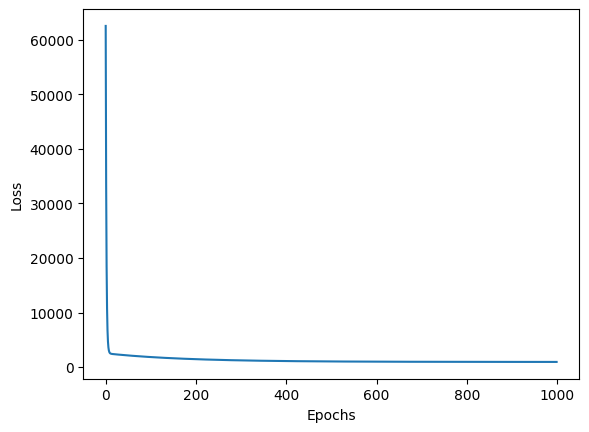

In [11]:
plt.plot(losses_valus)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

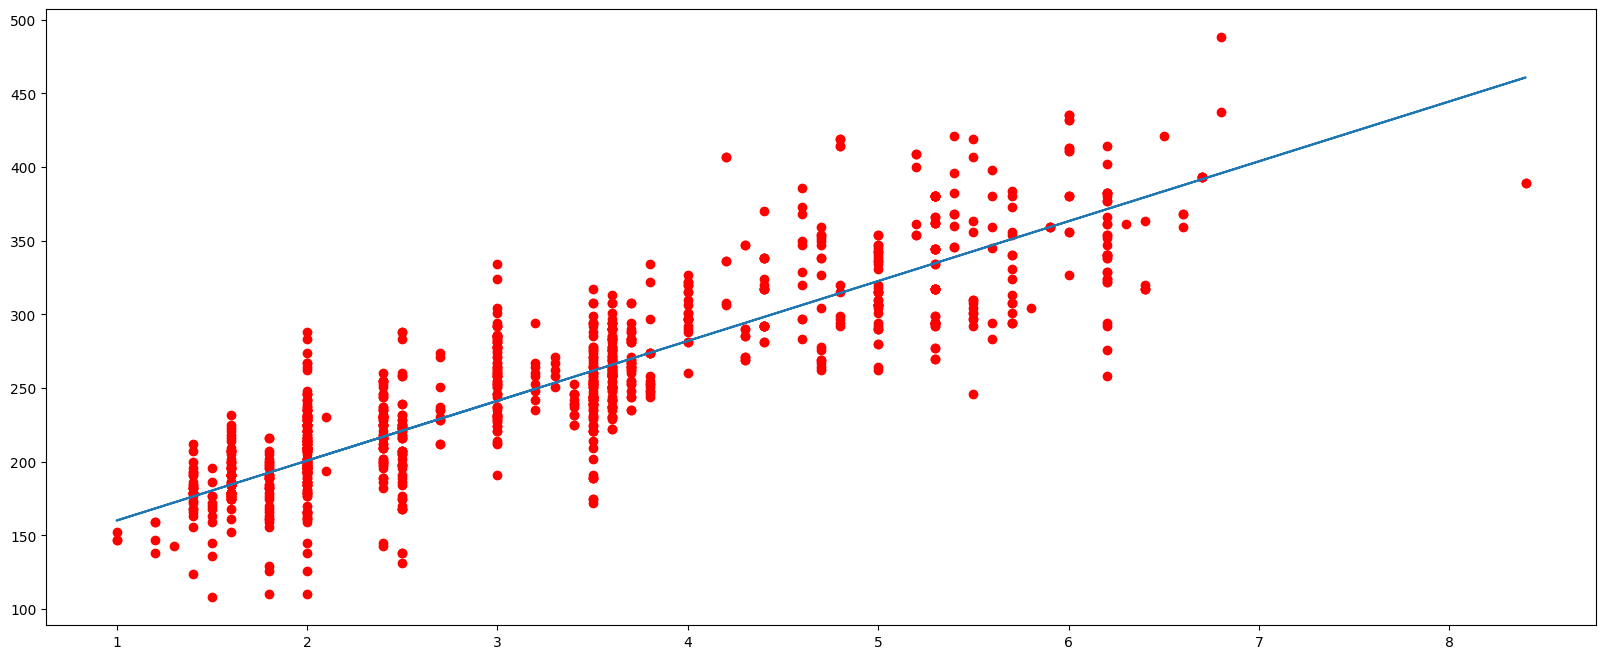

In [12]:
plt.figure(figsize=(20,8))
plt.scatter(x.numpy() , y.numpy() , color = 'red')
plt.plot(x.numpy(), w*x.numpy()+ b)
plt.show()

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [14]:
model = Sequential()
model.add (Dense(units = 3 , activation = "relu" , input_shape = (3,)))
model.add (Dense(units = 3 , activation = "relu" ))
model.add(Dense(units = 1))

C:\Users\Mgama\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28 (112.00 B)

 Trainable params: 28 (112.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
model = Sequential()

model.add(Dense(units=4, activation='sigmoid', input_shape=(4,)))
model.add(Dense(units=4, activation='sigmoid'))
model.add(Dense(units=3, activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55 (220.00 B)

 Trainable params: 55 (220.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Multilayer Perceptron
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
visible = Input(shape=(10,))
hidden1 = Dense(500, activation='tanh')(visible)#layer-1
hidden2 = Dense(300, activation='tanh')(hidden1)
hidden3 = Dense(100, activation='tanh')(hidden2)

output = Dense(1, activation='sigmoid')(hidden3)
model = Model(inputs=visible, outputs=output)
# summarize layers
print(model.summary())

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 500)            │         5,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 300)            │       150,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 186,001 (726.57 KB)

 Trainable params: 186,001 (726.57 KB)

 Non-trainable params: 0 (0.00 B)

None


In [18]:
from keras.optimizers import Adam
import numpy as np

model.compile(optimizer=Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [19]:
x_train = np.random.rand(100,10)
y_train = np.random.randint(0,2, size=(100,))

In [20]:
x_test = np.random.rand(20,10)
y_test = np.random.randint(0,2, size=(20,))

In [21]:
model.fit (x_train, y_train, epochs=100, batch_size=10, verbose=1)
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Evaluation results - Loss: {loss} , Accuracy: {accuracy}')

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5300 - loss: 0.7363
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5600 - loss: 0.6978 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5300 - loss: 0.6696 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5900 - loss: 0.6797 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6000 - loss: 0.6828 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5800 - loss: 0.6654 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5300 - loss: 0.6647 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5700 - loss: 0.6629 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5700 - loss: 0.6702 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5300 - loss: 0.6588 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5800 - loss: 0.6631 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step -